In [69]:
import pandas as pd
import scipy as sp
import numpy as np

from abtools.bayesian import LognormalABModel
from abtools.plotting import qqplot, ppplot

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [70]:
data = pd.read_csv('data.csv')

In [128]:
log_data = np.log(data.revenue)

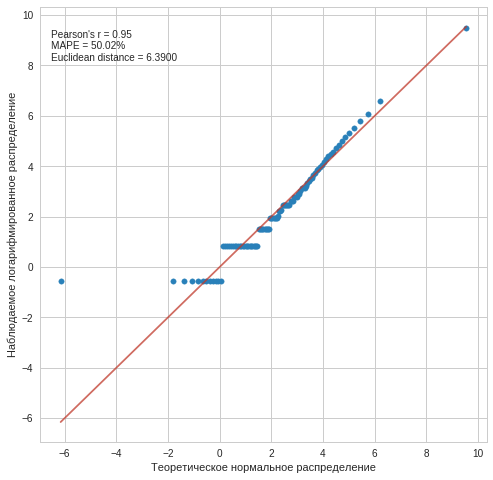

In [145]:
ax = qqplot(sp.stats.norm(loc=log_data.mean(), scale=log_data.std()).rvs(100000), log_data, num_points=100)[0]
ax.set_xlabel('Теоретическое нормальное распределение')
ax.set_ylabel('Наблюдаемое логарифмированное распределение')
ax.set_title('')
plt.savefig('qqplotlognormal.pdf')

In [121]:
a = data.query('abgroup == "control"')['revenue']
b = data.query('abgroup == "test"')['revenue']*1.03

print('ARPPU')
print('Mean: %.4f' % a.mean())
print('Mean: %.4f' % b.mean())
print('B больше A на %.4f = %d%%' % (b.mean()- a.mean(), 
                                    (b.mean() / a.mean()-1)*100))

ARPPU
Mean: 48.0900
Mean: 50.9172
B больше A на 2.8273 = 5%


In [122]:
m = (a.mean() + b.mean()) / 2
v = (a.var() + b.var()) / 2

def mu(m, v):
    return np.log(m / np.sqrt(1 + v / (m ** 2)))

def sd(m, v):
    return 1 / np.log(1 + v / (m ** 2))

In [4]:
import daft
%matplotlib inline

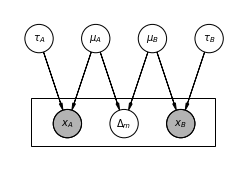

In [15]:
pgm = daft.PGM([4, 3], origin=[0, 0])
pgm.add_node(daft.Node("muA", r"$\mu_A$", 1.5, 2.5))
pgm.add_node(daft.Node("tA", r"$\tau_A$", 0.5, 2.5))
pgm.add_node(daft.Node("muB", r"$\mu_B$", 2.5, 2.5))
pgm.add_node(daft.Node("tB", r"$\tau_B$", 3.5, 2.5))
pgm.add_node(daft.Node("mA", r"$\mu_B$", 2.5, 2.5))
pgm.add_node(daft.Node("mB", r"$\tau_B$", 3.5, 2.5))
pgm.add_node(daft.Node("A", r"$x_A$", 1, 1, aspect=1, observed=True))
pgm.add_node(daft.Node("B", r"$x_B$", 3, 1, aspect=1, observed=True))
pgm.add_node(daft.Node("d_m", r"$\Delta_{m}$", 2, 1, aspect=1))

pgm.add_edge('muA','A')
pgm.add_edge('muB','B')
pgm.add_edge('tA','A')
pgm.add_edge('tB','B')
pgm.add_edge('mA','d_m')
pgm.add_edge('mB','d_m')

pgm.add_plate(daft.Plate([0.35, 0.7, 3.25, 0.75], shift=-0.1))
pgm.render()

pgm.figure.savefig("lognormal_model.png", dpi=350)
pgm.figure.savefig("lognormal_model.pdf", dpi=350)

In [123]:
print(mu(m, v))
print(sd(m, v))

2.48364834145
0.352510611128


In [124]:
model = LognormalABModel(a, b)
model.fit()

Optimization terminated successfully.
         Current function value: 208346.751548
         Iterations: 9
         Function evaluations: 17
         Gradient evaluations: 17


100%|██████████| 10000/10000 [00:08<00:00, 1203.10it/s]


In [125]:
model.summary()

,mean,sd,mc_error,hpd_2.5,hpd_97.5
$\mu_{ln(A)}$,2.168028,0.011172,0.000273,2.146231,2.189726
$\mu_{ln(B)}$,2.208691,0.011076,0.000294,2.187788,2.230978
$\tau_A$,0.333786,0.002906,0.000075,0.328137,0.339353
$\tau_B$,0.333563,0.002930,0.000069,0.328136,0.339459
$\mu_A$,39.105023,0.666744,0.016148,37.811063,40.375645
$\mu_B$,40.769156,0.706093,0.016772,39.368507,42.114713
$A_{\sigma^2}$,28.115076,0.628402,0.015378,26.909046,29.354676
$B_{\sigma^2}$,30.496994,0.674865,0.017902,29.241130,31.879302
$\Delta_{\mu}$,1.664133,0.987072,0.025039,-0.235070,3.620537
$\Delta_{\sigma}$,0.220036,0.085719,0.002235,0.057928,0.392348


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5639967a58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f563955e898>], dtype=object)

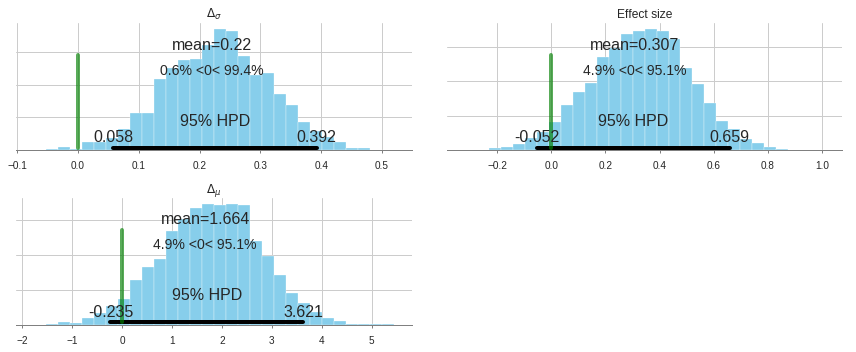

In [126]:
model.plot_deltas()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f56392e2080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5639230b70>], dtype=object)

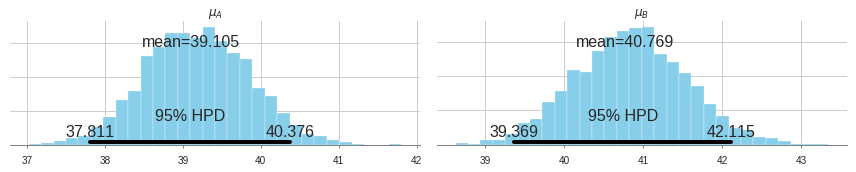

In [127]:
model.plot_params()